In [1]:
#firstly install Tensorflow framework for the Model
pip install tensorflow


In [27]:
#import necessary Library for this model
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input

In [3]:
# Define dataset paths
train_dir = 'D:\Train_image'  
test_dir = 'D:/Test_image'

In [4]:
# Define image size and batch size
img_size = (224, 224)
batch_size = 32

In [5]:
# Create data generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['Fetal abdomen', 'Fetal thorax', 'Fetal brain', 'Fetal femur']
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes=['Fetal abdomen', 'Fetal thorax', 'Fetal brain', 'Fetal femur']
)


Found 1646 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [6]:
# Build the model
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#  Train the model 
####Below is the code for the train the model but it already train. So didn't excute the code again
 num_epochs = 10
 steps_per_epoch = train_generator.n // batch_size
 validation_steps = test_generator.n // batch_size

 model.fit(
     train_generator,
     steps_per_epoch=steps_per_epoch,
     epochs=num_epochs,
     validation_data=test_generator,
     validation_steps=validation_steps
 )

#  Save the model
 model.save('Deep_learningmodel_Ultrasound.h5')

In [10]:
#import necessary library for prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model

In [11]:
loaded_model = load_model('Deep_learningmodel_Ultrasound.h5')

In [12]:
#Define Class Label
class_names = ['Fetal abdomen', 'Fetal thorax', 'Fetal brain', 'Fetal femur']

In [13]:
# Load and unseen a image for prediction
new_image_path = 'D:/Test_image/Patient01606_Plane3_2_of_5.png' 
new_image = load_img(new_image_path, target_size=img_size)
new_image_array = img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
new_image_array /= 255.0

In [14]:
#Make Prediction
predictions = loaded_model.predict(new_image_array)
predicted_class_idx = np.argmax(predictions)
predicted_class = class_names[predicted_class_idx]

print(f'Predicted Class: {predicted_class}')

1/1 [==============================] - 1s 1s/step
Predicted Class: Fetal thorax


In [15]:
#Path that containing test_images

test_images_dir = 'D:/Test_image'


In [16]:
#Define Image size
img_size = (224, 224)

In [17]:
# Get a list of image file names
image_files = os.listdir(test_images_dir)

In [18]:
# Initialize lists to store images and image paths
batch_images = []
image_paths = []

In [19]:
#Preprocess the image
for image_file in image_files:
    image_path = os.path.join(test_images_dir, image_file)
    image = load_img(image_path, target_size=img_size)
    image_array = img_to_array(image)
    image_array = image_array / 255.0  # Normalize pixel values
    batch_images.append(image_array)
    image_paths.append(image_path)

In [20]:
#Convert the list of images to a NumPy array
batch_images = np.array(batch_images)

In [21]:
# Make predictions for the batch
predictions = loaded_model.predict(batch_images)

2/2 [==============================] - 4s 615ms/step


In [22]:
# Interpret predictions for each image
for i, prediction in enumerate(predictions):
    predicted_class_idx = np.argmax(prediction)
    predicted_class = class_names[predicted_class_idx]
    image_path = image_paths[i]
    print(f'Image: {os.path.basename(image_path)}, Predicted Class: {predicted_class}')

Image: Patient01600_Plane6_1_of_8.png, Predicted Class: Fetal thorax
Image: Patient01606_Plane3_2_of_5.png, Predicted Class: Fetal thorax
Image: Patient01612_Plane1_19_of_21.png, Predicted Class: Fetal thorax
Image: Patient01616_Plane6_1_of_1.png, Predicted Class: Fetal thorax
Image: Patient01623_Plane4_2_of_3.png, Predicted Class: Fetal thorax
Image: Patient01630_Plane1_1_of_3.png, Predicted Class: Fetal thorax
Image: Patient01631_Plane1_14_of_16.png, Predicted Class: Fetal thorax
Image: Patient01635_Plane3_1_of_4.png, Predicted Class: Fetal brain
Image: Patient01650_Plane5_2_of_2.png, Predicted Class: Fetal femur
Image: Patient01653_Plane3_9_of_11.png, Predicted Class: Fetal brain
Image: Patient01655_Plane3_1_of_3.png, Predicted Class: Fetal thorax
Image: Patient01657_Plane1_2_of_2.png, Predicted Class: Fetal thorax
Image: Patient01660_Plane6_2_of_2.png, Predicted Class: Fetal thorax
Image: Patient01663_Plane3_4_of_5.png, Predicted Class: Fetal brain
Image: Patient01665_Plane3_2_of_3

In [23]:
#import matplotlib for displaying image also
import matplotlib.pyplot as plt

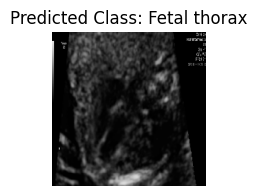

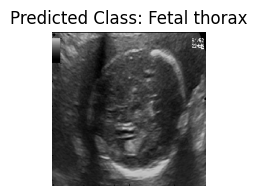

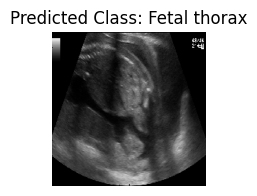

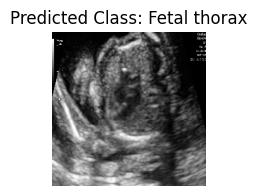

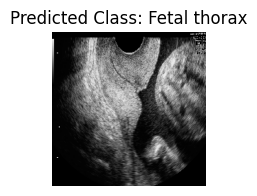

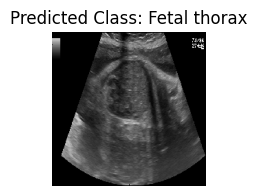

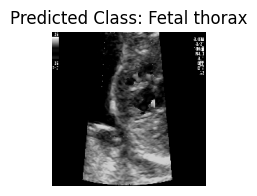

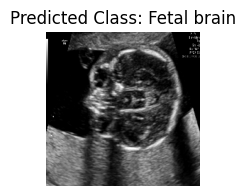

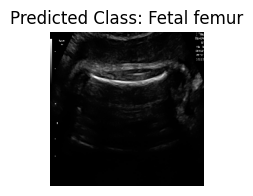

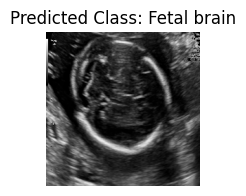

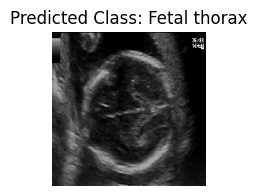

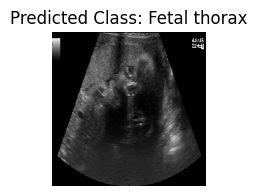

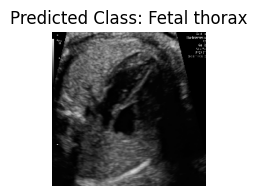

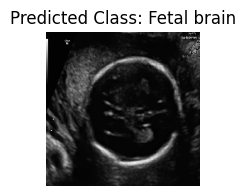

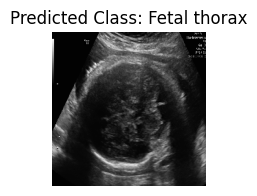

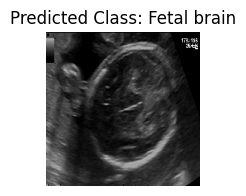

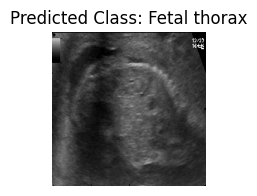

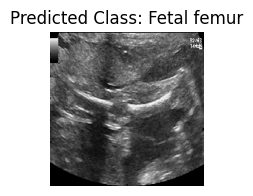

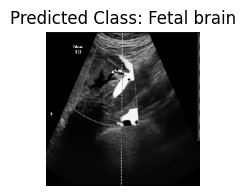

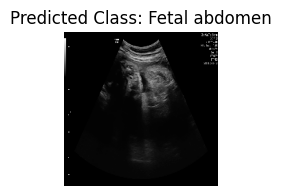

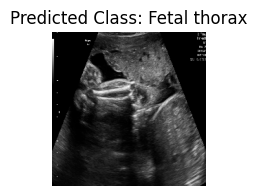

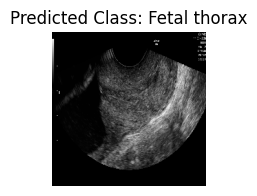

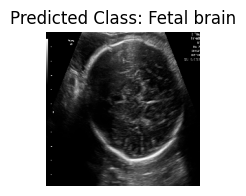

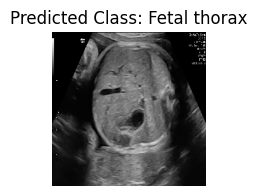

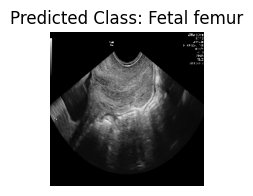

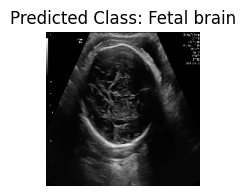

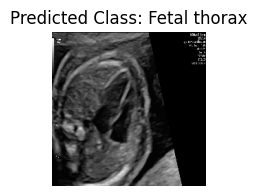

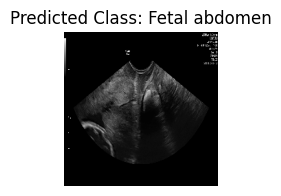

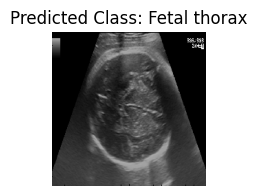

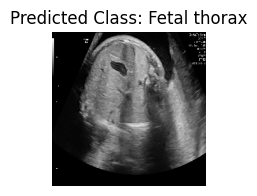

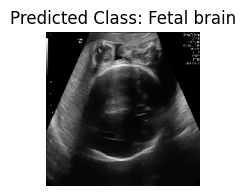

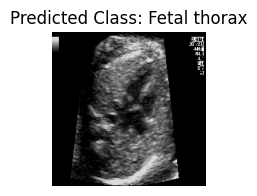

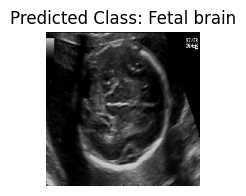

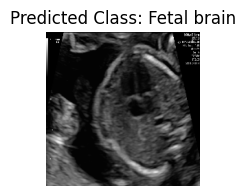

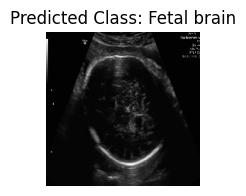

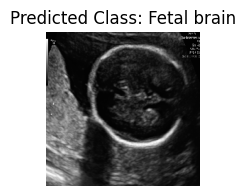

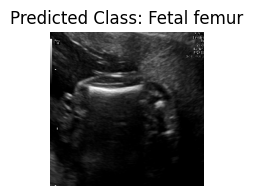

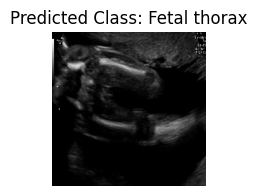

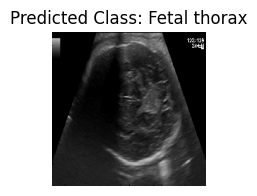

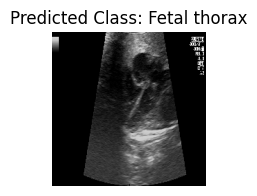

In [24]:
# Display images and predictions
for i, prediction in enumerate(predictions):
    predicted_class_idx = np.argmax(prediction)
    predicted_class = class_names[predicted_class_idx]
    image_path = image_paths[i]
    
    # Load the image for display
    image = load_img(image_path, target_size=img_size)
    
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()

In [26]:
predictions = []

In [31]:
for image_file in image_files:
    image_path = os.path.join(test_images_dir, image_file)
    image = load_img(image_path, target_size=img_size)
    image_array = img_to_array(image)
    image_array = preprocess_input(image_array)  # Preprocess for ResNet50
    image_array = np.expand_dims(image_array, axis=0)

    # Make a prediction
    prediction_probs = model.predict(image_array)[0]
    predicted_class_idx = np.argmax(prediction_probs)
    predicted_class = class_names[predicted_class_idx]

    # Store the prediction result
    predictions.append((image_file, predicted_class))

    # Display and save the image with the predicted class label
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')
    plt.savefig(f'predicted_{image_file}')  # Save the image
    plt.close()  # Close the plot to prevent display during batch processing

# Export predictions to a text file
output_file = 'Image.txt'
with open(output_file, 'w') as f:
    for image_file, predicted_class in predictions:
        f.write(f"Image: {image_file}, Predicted Class: {predicted_class}\n")

print(f"Predictions exported to {output_file}")

1/1 [==============================] - 0s 165ms/step
Predictions exported to Image.txt
